# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.9


## Exercício: Análise Exploratória de Dados com Python

Neste exercício, você vai realizar uma análise exploratória em um dos mais famosos datasets para Machine Learning, o dataset iris com informações sobre 3 tipos de plantas. Esse dataset é comumente usado em problemas de Machine Learning de classificação, quando nosso objetivo é prever a classe dos dados. No caso deste dataset, prever a categoria de uma planta a partir de medidas da planta (sepal e petal).

Em cada célula, você encontra a tarefa a ser realizada. Faça todo o exercício e depois compare com a solução proposta.

Dataset (já disponível com o Scikit-Learn): https://archive.ics.uci.edu/ml/datasets/iris

In [78]:
# Imports
import time
import numpy as np
import pandas as pd
import matplotlib as mat
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

fontsize = 14
ticklabelsize = 14

In [3]:
np.__version__

'1.19.2'

In [4]:
pd.__version__

'1.2.1'

In [5]:
mat.__version__

'3.3.2'

In [51]:
# Carregando o dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Extração e Transformação de Dados

In [52]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: setosa, versicolor ou virginica
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: 0, 1 ou 2
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
# Inclua no dataset uma coluna com os valores numéricos da variável target
df['especies'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
# Adicione ao dataset uma nova coluna com os nomes das espécies, pois é isso que vamos tentar prever (variável target)
df['nome_especie'] = iris.target_names[df['especies']]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especies,nome_especie
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [56]:
# Extraia as features (atributos) do dataset e imprima 
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'especies', 'nome_especie'],
      dtype='object')

In [57]:
# Calcule a média de cada feature para as 3 classes
# 'setosa', 'versicolor', 'virginica'


def media(especie):
    print(iris.target_names[especie])
    print(df.query(f'especies == {especie}').mean())
    print('-'*40)

media(0) # setosa
media(1) # versicolor
media(2) # virginica

setosa
sepal length (cm)    5.006
sepal width (cm)     3.428
petal length (cm)    1.462
petal width (cm)     0.246
especies             0.000
dtype: float64
----------------------------------------
versicolor
sepal length (cm)    5.936
sepal width (cm)     2.770
petal length (cm)    4.260
petal width (cm)     1.326
especies             1.000
dtype: float64
----------------------------------------
virginica
sepal length (cm)    6.588
sepal width (cm)     2.974
petal length (cm)    5.552
petal width (cm)     2.026
especies             2.000
dtype: float64
----------------------------------------


## Exploração de Dados

In [60]:
# Imprima uma Transposta do dataset (transforme linhas e colunas e colunas em linhas)
df_transporto = df.transpose()
df_transporto

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
especies,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
nome_especie,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica


In [61]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   especies           150 non-null    int32  
 5   nome_especie       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [62]:
# Faça um resumo estatístico do dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especies
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [63]:
# Verifique se existem valores nulos no dataset
df.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especies,nome_especie
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [64]:
# Faça uma contagem de valores de sepal length
df['sepal length (cm)'].count()

150

## Plot

<AxesSubplot:>

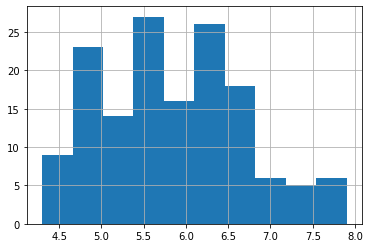

In [128]:
# Crie um Histograma de sepal length
df['sepal length (cm)'].hist()


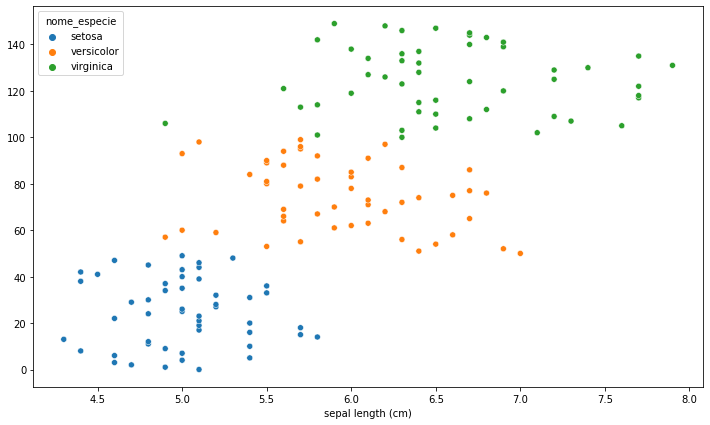

In [105]:
# Crie um Gráficos de Dispersão (scatter Plot) da variável sepal length versus número da linha, 
# colorido por marcadores da variável target
plt.figure(figsize = (12,7))
sns.scatterplot(x='sepal length (cm)', y=df.index.values, hue='nome_especie', data=df);
plt.show()

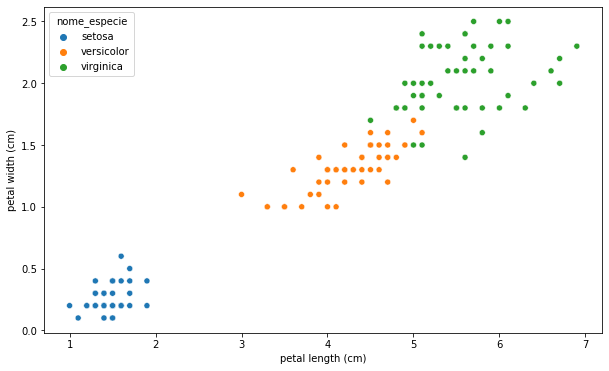

In [106]:
# Crie um Scatter Plot de 2 Features (atributos)
plt.figure(figsize = (10,6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='nome_especie', data=df);
plt.show()

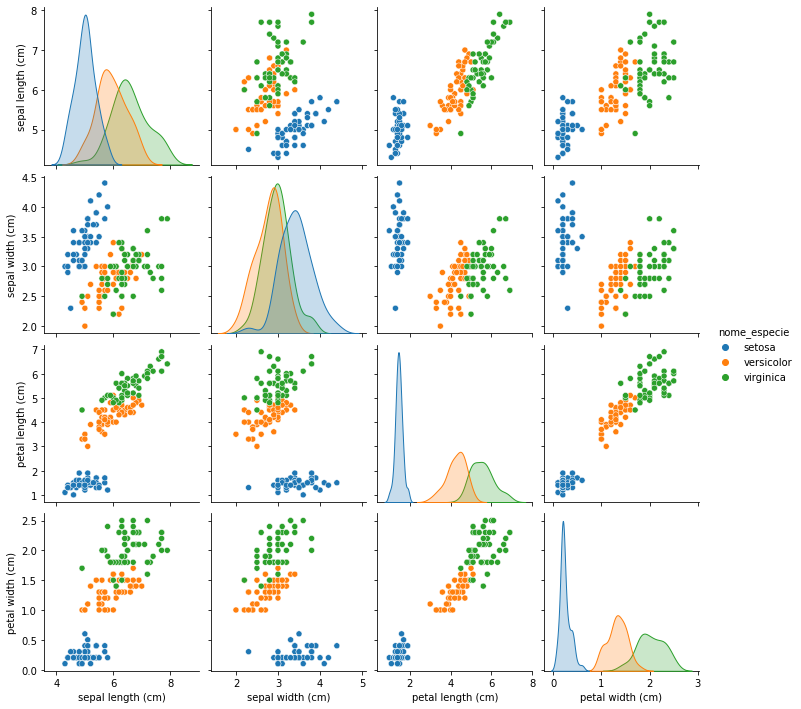

In [111]:
# Crie um Scatter Matrix das Features (atributos)
features = df[['sepal length (cm)', 'sepal width (cm)', 
                'petal length (cm)', 'petal width (cm)', 'nome_especie']]
sns.pairplot(features, hue="nome_especie")
plt.show()

C:\Users\c050654\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


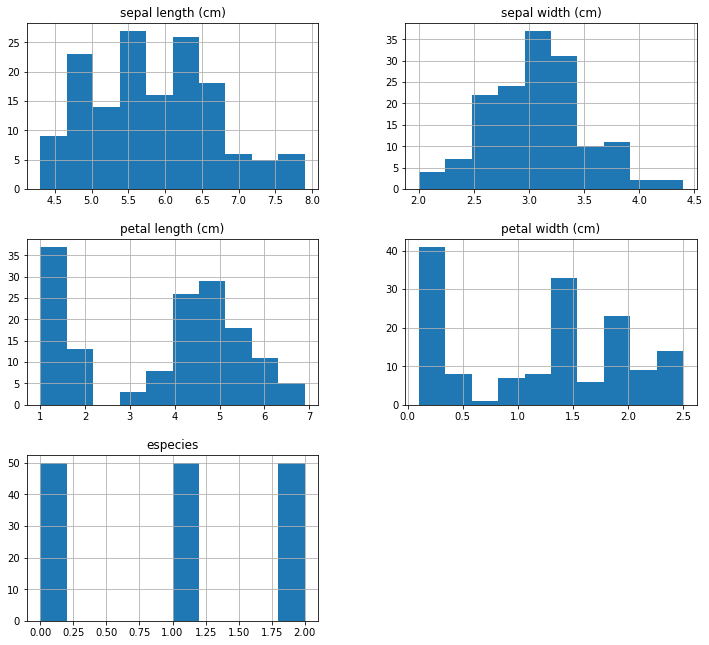

In [124]:
# Crie um Histograma de todas as features
# df.hist(figsize=(12,12))
fig = plt.figure(figsize = (12,11))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

# Fim